# Synthetic Data Creation with BlenderProc

BlenderProc diusulkan di [BlenderProc](https://arxiv.org/pdf/1911.01911.pdf) oleh Denninger, et. al. dan merupakan pipeline modular yang dibangun di atas [Blender](https://www.blender.org/). Ini dapat digunakan untuk menghasilkan gambar dalam berbagai kasus penggunaan, termasuk segmentasi, kedalaman, normal, dan estimasi pose.  Notebook ini diadaptasi dari [di sini](https://github.com/DLR-RM/BlenderProc/blob/main/examples/basics/basic/basic_example.ipynb) dan mendemonstrasikan contoh dasar yang tersedia di `examples/basic `.

Kita akan melihat bagaimana kita dapat menyiapkan lingkungan BlenderProc di dalam Google Colab dan menghasilkan data fotorealistik yang dapat digunakan untuk melatih model pembelajaran mesin.

Pertama, kita akan mengkloning [repositori BlenderProc] resmi (https://github.com/DLR-RM/BlenderProc) dari GitHub menggunakan Git.

In [1]:
!git clone https://github.com/DLR-RM/BlenderProc.git
%cd "BlenderProc"

Cloning into 'BlenderProc'...
remote: Enumerating objects: 45564, done.
remote: Counting objects: 100% (7304/7304), done.
remote: Compressing objects: 100% (421/421), done.
remote: Total 45564 (delta 6998), reused 6886 (delta 6883), pack-reused 38260 (from 3)
Receiving objects: 100% (45564/45564), 94.12 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (34481/34481), done.
/content/BlenderProc


To be able to use the blenderproc command, we install it via pip:

In [2]:
!pip install -e .

Obtaining file:///content/BlenderProc
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=41f27464c5cf26e763c348ad30f9acaa80291f33ef3ae10299f1093ba1c8d78f
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar
  Running setup.py develop for blenderproc


We first have to update the `LD_PRELOAD` environment variable

In [3]:
import os

os.environ["LD_PRELOAD"] = ""

!apt remove libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.5.9"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  google-perftools libgoogle-perftools4 libtcmalloc-minimal4
0 upgraded, 0 newly installed, 3 to remove and 49 not upgraded.
After this operation, 1,817 kB disk space will be freed.
(Reading database ... 123634 files and directories currently installed.)
Removing google-perftools (2.9.1-0ubuntu3) ...
Removing libgoogle-perftools4:amd64 (2.9.1-0ubuntu3) ...
Removing libtcmalloc-minimal4:amd64 (2.9.1-0ubuntu3) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/loc

Untuk dapat menggunakan matplotlib di dalam BlenderProc, kita harus menginstal ipykernel di dalam lingkungan python blender. Karena ini adalah perintah blenderproc pertama, maka blender juga akan diinstal terlebih dahulu:

In [4]:
!blenderproc pip install ipykernel --blender-install-path ./

100% ||
Using blender in ./blender-4.2.1-linux-x64
Looking in links: /tmp/tmpd3htsp0a
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/ef/7d/500c9ad20238fcfcb4cb9243eede163594d7020ce87bd9610c9e02771876/pip-24.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Installing pip package ipykernel None
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.6/821.6 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress 

## Penggunaan

BlenderProc menyediakan beberapa skrip dasar untuk membantu kita memulai.  Mari kita mulai dengan menjalankan contoh dasarnya.

* Kami menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/basic/main.py`.

* Argumen kedua berhubungan dengan file pose kamera. Dalam hal ini, kami telah menentukan dua pose kamera di file `examples/basics/basic/camera_positions`. Kiat pro: Anda dapat mengedit file camera_positions untuk menghasilkan lebih banyak pose kamera dengan mengklik dua kali file di dalamnya.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [5]:
!blenderproc run examples/basics/basic/main.py examples/resources/camera_positions examples/resources/scene.obj examples/basics/basic/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_567b52b91abc4992a5921e323b2e000a
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Installing pip package wheel None
Installing pip package wheel None
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Installing pip package pyyaml 6.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 26.1 MB/s eta 0:00:00
Installing pip package imageio 2.34.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Installing pip package gitpython 3.1.43
Installing pip package scikit-image 0.23.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

We visualize the second rendered color, depth and normal image which corresponds to the `1.hdf5` file inside the `examples/basics/basic/output` folder

examples/basics/basic/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


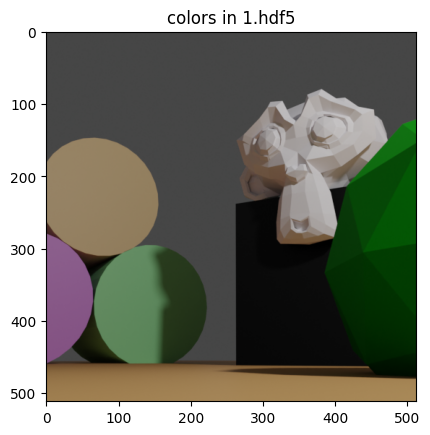

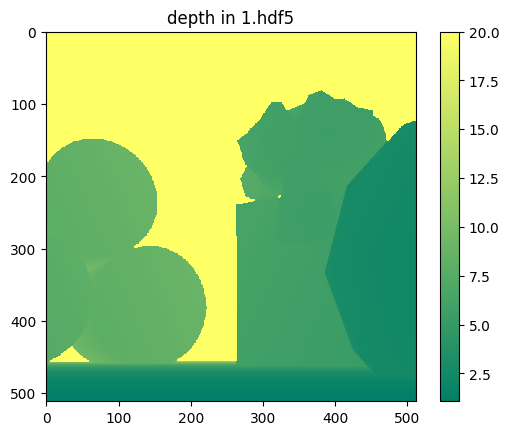

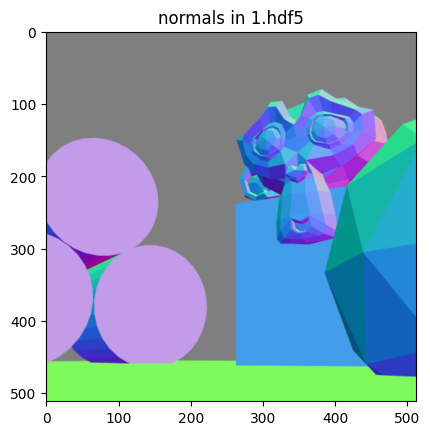

In [6]:
# Visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/basic/output/1.hdf5"

## Contoh Pose Objek Kamera

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/camera_object_pose/main.py`.

* Argumen kedua sesuai dengan file objek-`examples/basics/camera_object_pose/obj_000004.ply`.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan-`examples/basics/camera_object_pose/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [7]:
!blenderproc run examples/basics/camera_object_pose/main.py examples/basics/camera_object_pose/obj_000004.ply examples/basics/camera_object_pose/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_f83feb2be7e34a1a97732da53b333ee6
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
PLY import of 'obj_000004.ply' took 305.13 ms
Rendering 1 frames of colors, depth...
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 1           
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 1                                        
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 1
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Contoh Pengambilan Sampel Kamera

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/camera_sampling/main.py`.

* Argumen kedua sesuai dengan file objek adegan-`examples/resources/scene.obj`.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan-`examples/basics/camera_sampling/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [8]:
!blenderproc run examples/basics/camera_sampling/main.py examples/resources/scene.obj examples/basics/camera_sampling/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_4a7da081dd8647159f637997256a53d7
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
OBJ import of 'scene.obj' took 5.85 ms
Rendering 5 frames of colors, depth, normals...
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 5                                        
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 5                           
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- 

examples/basics/camera_sampling/output/0.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


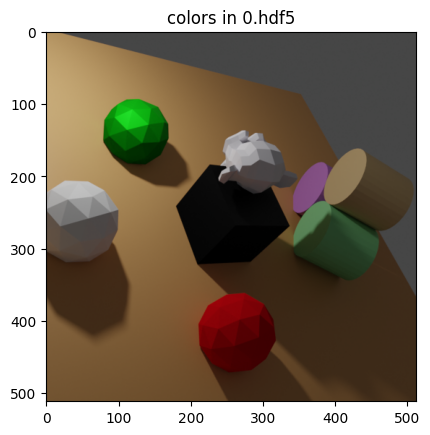

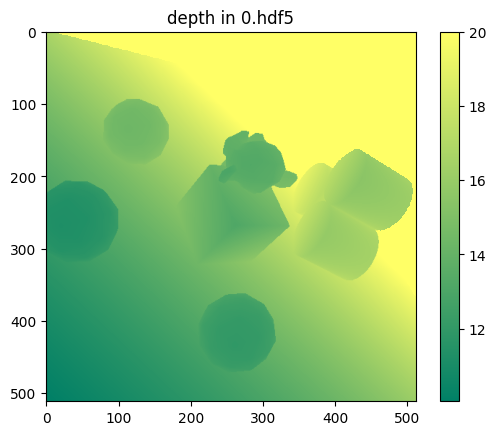

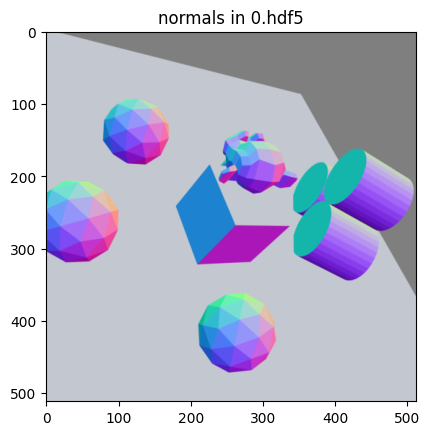

In [9]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/camera_sampling/output/0.hdf5"

examples/basics/camera_sampling/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


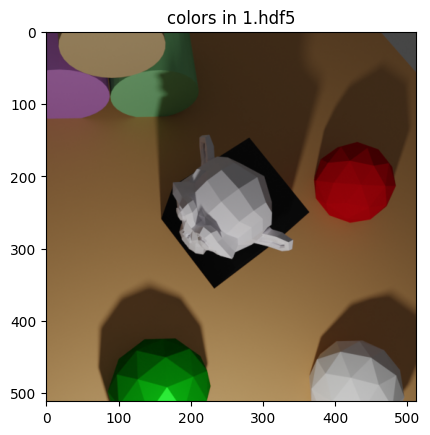

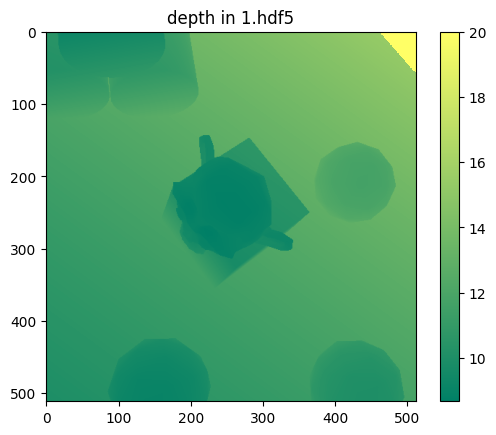

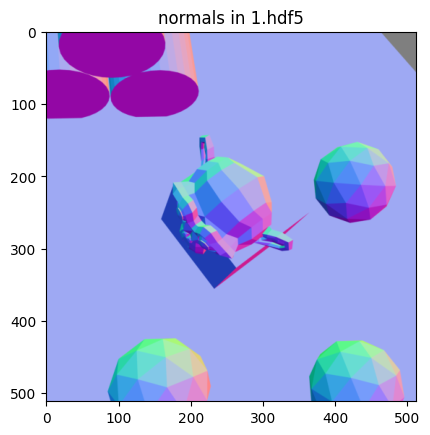

In [10]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/camera_sampling/output/1.hdf5"

## Contoh Manipulasi Entitas

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/entity_manipulation/main.py`.

* Argumen kedua sesuai dengan file objek adegan-`examples/resources/scene.obj`.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan-`examples/basics/entity_manipulation/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [11]:
!blenderproc run examples/basics/entity_manipulation/main.py examples/resources/scene.obj examples/basics/entity_manipulation/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_7b3affc7b6d0433fb7dfe5232fec173c
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
OBJ import of 'scene.obj' took 5.01 ms
Rendering 2 frames of colors, depth, normals...
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2                                        
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2                                        
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━

examples/basics/entity_manipulation/output/0.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


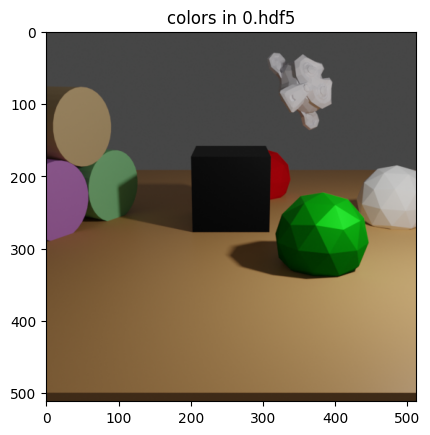

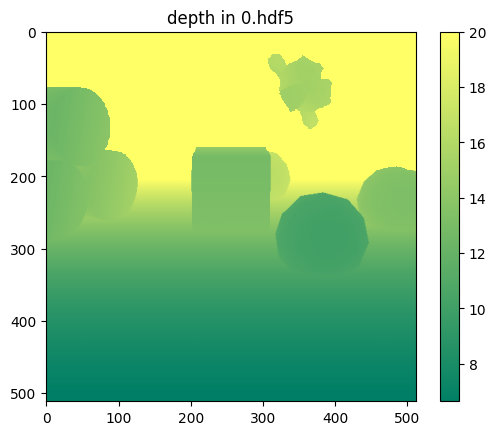

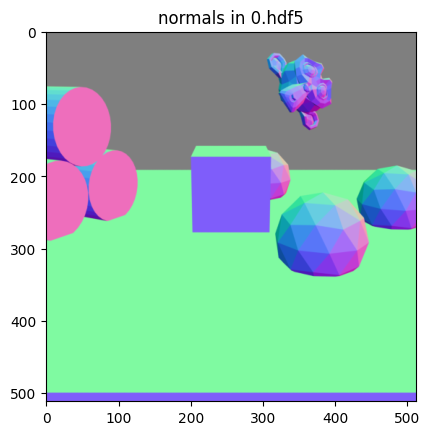

In [12]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/entity_manipulation/output/0.hdf5"

examples/basics/entity_manipulation/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


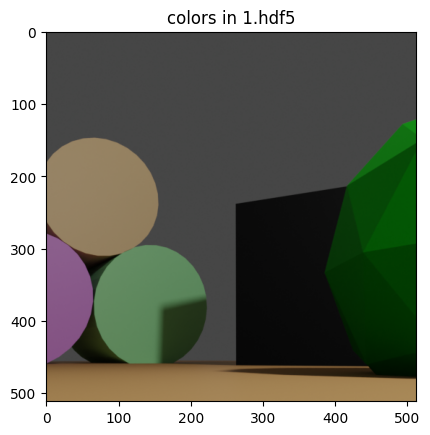

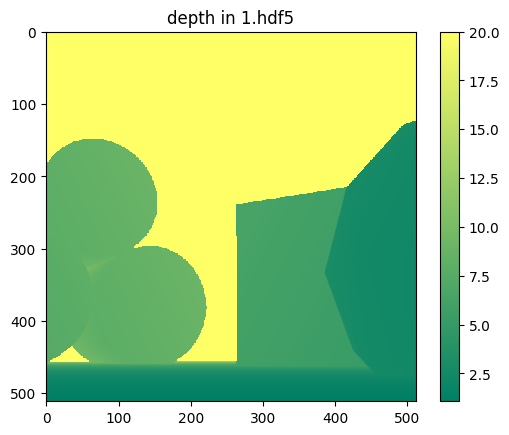

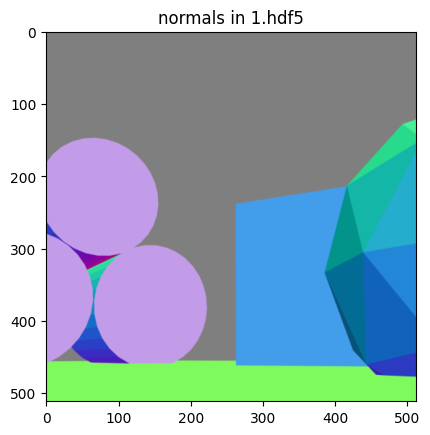

In [13]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/entity_manipulation/output/1.hdf5"

## Contoh Pengambilan Sampel Ringan

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/light_sampling/main.py`.

* Argumen kedua sesuai dengan file objek adegan-`examples/resources/scene.obj`.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan-`examples/basics/light_sampling/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [14]:
!blenderproc run examples/basics/light_sampling/main.py examples/resources/camera_positions examples/resources/scene.obj examples/basics/light_sampling/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_d3fbbcd869ac4afba376601cdafa347f
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
OBJ import of 'scene.obj' took 2.77 ms
Rendering 2 frames of colors...
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2                                        
Total         ━━━━━ -:--… Rendering frame 1 of 2                                                    
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━

examples/basics/light_sampling/output/0.hdf5: 
Keys: 'colors': (512, 512, 3)


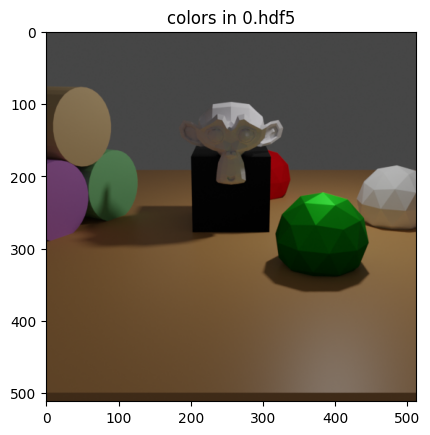

In [15]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/light_sampling/output/0.hdf5"

examples/basics/light_sampling/output/1.hdf5: 
Keys: 'colors': (512, 512, 3)


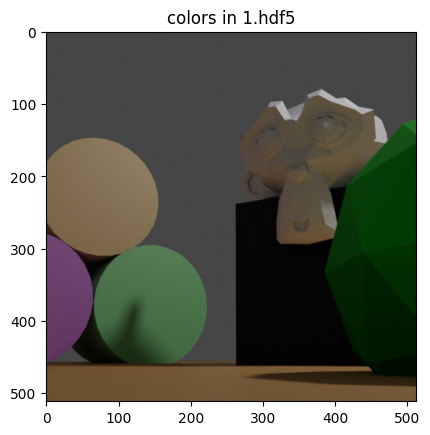

In [16]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/light_sampling/output/1.hdf5"

## Pemosisian Fisika

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/physics_positioning/main.py`.

* Argumen kedua sesuai dengan file objek-`examples/basics/physics_positioning/passive.obj`.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan-`examples/basics/physics_positioning/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [17]:
!blenderproc run examples/basics/physics_positioning/main.py examples/basics/physics_positioning/active.obj examples/basics/physics_positioning/passive.obj examples/basics/physics_positioning/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_3960b25c57164b42b865509a9d6e8580
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
OBJ import of 'active.obj' took 1.96 ms
OBJ import of 'passive.obj' took 411.93 ms
It took 1 tries to place Icosphere
It took 1 tries to place Icosphere.001
It took 1 tries to place Icosphere.002
It took 1 tries to place Icosphere.003
It took 1 tries to place Icosphere.004
It took 2 tries to place Icosphere.005
Running simulation up to 4 seconds (96 frames)
Running simulation up to 5 seconds (120 frames)
Running simulation up to 6 seconds (144 frames)
Running simulation up to 7 seconds (168 frames)
Running simulation up to 8 seconds (192 frames)
Running simulation up to 9 seconds (216 frames)
Running simulation up to 10 seconds (240 frames)
Running simulation up to 11 

examples/basics/physics_positioning/output/0.hdf5: 
Keys: 'colors': (512, 512, 3)


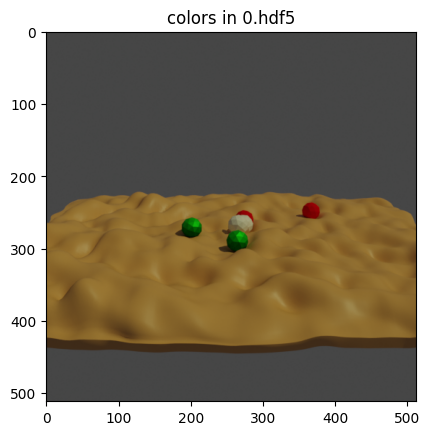

In [18]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/physics_positioning/output/0.hdf5"

## Manipulasi Material

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi-`examples/basics/material_manipulation/main.py`.

* Argumen kedua sesuai dengan file objek-`examples/basics/material_manipulation/scene.obj`.

* Argumen ketiga sesuai dengan direktori keluaran tempat data yang kita hasilkan akan disimpan-`examples/basics/material_manipulation/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [19]:
!blenderproc run examples/basics/material_manipulation/main.py examples/basics/material_manipulation/scene.obj images examples/basics/material_manipulation/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_57f3d8e759dd483ca08cd4b24e0c592b
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
Loaded image from: 'examples/basics/material_manipulation/sample_texture.jpg'
OBJ import of 'scene.obj' took 3.19 ms
Rendering 2 frames of colors...
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2                                        
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:

examples/basics/material_manipulation/output/0.hdf5: 
Keys: 'colors': (512, 512, 3)


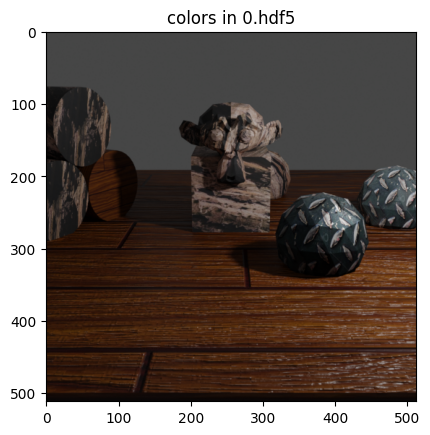

In [20]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/material_manipulation/output/0.hdf5"

examples/basics/material_manipulation/output/1.hdf5: 
Keys: 'colors': (512, 512, 3)


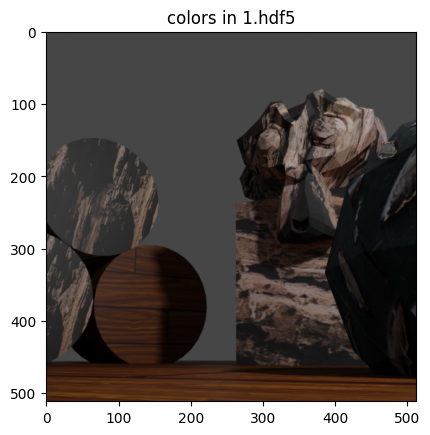

In [21]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/material_manipulation/output/1.hdf5"

## Contoh Segmentasi Semantik

* Pengingat: kita menjalankan program BlenderProc menggunakan `blenderproc run` bersama dengan argumen baris perintah yang diperlukan.

* Argumen pertama menentukan lokasi file python yang harus dieksekusi: `examples/basics/semantic_segmentation/main.py`.

* Argumen kedua sesuai dengan file pose kamera: `examples/resources/camera_positions`.

* Argumen ketiga sesuai dengan file campuran: `examples/basics/semantic_segmentation/scene.blend`.

* Argumen keempat berhubungan dengan direktori keluaran tempat data yang kita hasilkan akan disimpan: `examples/basics/semantic_segmentation/output`.

* Kami menentukan pelat pemasangan Blender khusus dengan tanda `--blender-install-path` yang diperlukan karena tidak ada folder pengguna yang tersedia di colab.

In [22]:
!blenderproc run examples/basics/semantic_segmentation/main.py examples/resources/camera_positions examples/basics/semantic_segmentation/scene.blend examples/basics/semantic_segmentation/output --blender-install-path ./

Using temporary directory: /dev/shm/blender_proc_205c4165c0b64e06b17cfc578f43fb64
Using blender in ./blender-4.2.1-linux-x64
Blender 4.2.1 LTS (hash 396f546c9d82 built 2024-08-19 23:32:23)
Selecting render devices...
Device Tesla T4 of type OPTIX found and used.
Device Intel Xeon CPU @ 2.20GHz of type CPU found and used.
Imported 9 objects
Selected 9 of the loaded objects by type
Rendering 2 frames of colors, depth, segmap...
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:--  
Total         ━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2                                        
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ -:--:-- Rendering frame 1 of 2
Total         ━━━━━━━━━━━━━━━━━━━━━━━

examples/basics/semantic_segmentation/output/0.hdf5: 
Keys: 'category_id_segmaps': (512, 512), 'colors': (512, 512, 3), 'depth': (512, 512), 'instance_segmaps': (512, 512)


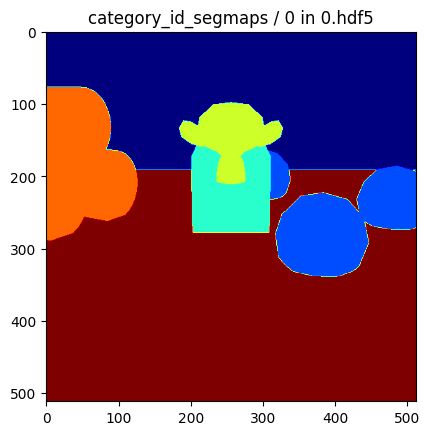

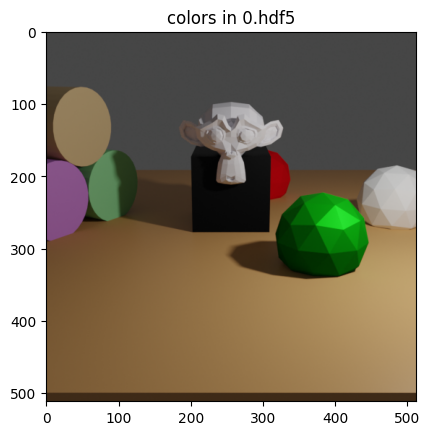

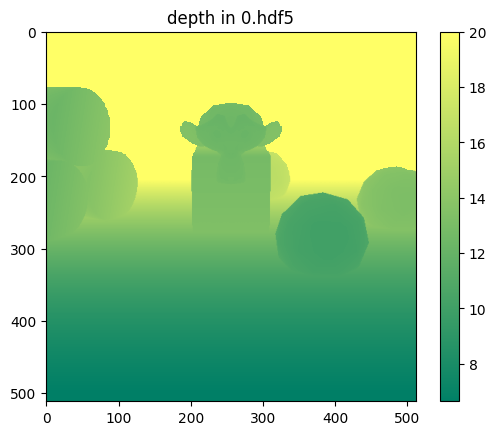

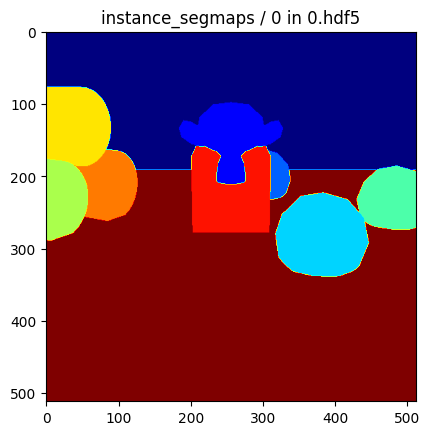

In [23]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/semantic_segmentation/output/0.hdf5"